In [162]:
# Data manipulation and analysis
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations

# Data visualization
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For advanced data visualizations

# Machine learning and model building
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer  # For converting text data into numerical features
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding categorical variables and scaling numerical data
from sklearn.ensemble import RandomForestClassifier  # For building a classification model
from sklearn.svm import SVC  # For Support Vector Machine classifier

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score  # For evaluating the model's performance

# Natural Language Processing (NLP)
import nltk  # For natural language processing tasks
from nltk.corpus import stopwords  # For removing common stopwords in text preprocessing
from nltk.tokenize import word_tokenize  # For tokenizing text into individual words
from nltk.stem import WordNetLemmatizer  # For reducing words to their base form
nltk.download('omw-1.4')
nltk.download('stopwords')  # Download stopwords for text preprocessing
nltk.download('punkt')  # Download tokenizer for text preprocessing
nltk.download('wordnet')  # Download WordNet lemmatizer for text preprocessing

# Other utilities
import re  # For regular expressions used in text cleaning
import warnings  # For suppressing warnings
warnings.filterwarnings('ignore')  # Ignore warning messages


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hewi7\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hewi7\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hewi7\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hewi7\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [163]:
# 1. Load the Dataset
data_path = "../src/dataset/fake_job_postings.csv"
df = pd.read_csv(data_path)

In [105]:
#2. Data Understanding
print("Dataset Info:\n")
df.info()  #Display information about dataset columns and data types

print("\nSummary statistics:\n")
print(df.describe())  # Show summary statistics for numerical columns

print("\nClass Distribution:\n")
print(df['fraudulent'].value_counts())  # Display distribution of target lables

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  o

In [106]:
# 3. Data Cleaning and Preprocessing
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'<[^a-zA-Z]', '', text)  # Remove non-alphabet characters
    text = text.lower()  # Convert text to lowercase
    return text  # Return cleaned text


In [107]:
df['cleaned_description'] = df['description'].fillna('').apply(clean_text)  # Apply cleaning function to text data

In [108]:
# Handle missing values and categorical features
df.fillna({'location': 'Unknown', 'employment_type': 'Unknown', 'required_experience': 'Unkown'}, inplace = True)  # Fill missing values
categorical_cols = ['location', 'employment_type', 'required_experience']  # List of categorical columns
encoder = LabelEncoder()  # Initialize lable encoder
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])  # Encode categorical variables

In [109]:
# Scale numerical features
scaler = StandardScaler()  # Initialize scaler for numerical features
df[['location', 'employment_type', 'required_experience']] = scaler.fit_transform(df[['location', 'employment_type', 'required_experience']])  # Scale features

In [110]:
# 4. Feature Engineering
vectorizer = TfidfVectorizer(max_features=1000) #  Initialize TF-IDF vectorizer with a maximum of 5000 features
text_features = vectorizer.fit_transform(df['cleaned_description']).toarray()  # Transform text data into numerical features

In [111]:
# Combine features
X = np.hstack((text_features, df[['location', 'employment_type', 'required_experience']].values))  # Combine text and meta features
y = df['fraudulent']  # Target variable

In [161]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)  # Split data into training and testing sets

In [113]:
# 6. Random Forest Basline Model-1
clf = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=42)
clf = RandomForestClassifier(n_jobs = -1, random_state = 42)  # Initialize Random Forest Classifier
clf.fit(X_train, y_train)  # Train the model on the training data

RandomForestClassifier(n_jobs=-1, random_state=42)

In [114]:
#df_sample = df.sample(frac=0.5, random_state=42)  # Use 50% of the data

In [115]:
# 7. Evaluatation
y_pred = clf.predict(X_test)  # Predict labels for the test set
y_proba = clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

In [131]:
print('Random Forest Classfication Report:\n')
print(classification_report(y_test, y_pred))  # Print classification report

Random Forest Classfication Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.99      0.53      0.69       173

    accuracy                           0.98      3576
   macro avg       0.98      0.77      0.84      3576
weighted avg       0.98      0.98      0.97      3576



In [129]:
print('Random Forest Confusion Matrix:\n')
print(confusion_matrix(y_test, y_pred))  # Print confusion matrix

Random Forest Confusion Matrix:

[[3402    1]
 [  81   92]]


In [130]:
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))  # Print ROC-AUC score

ROC-AUC Score: 0.9522335783285405


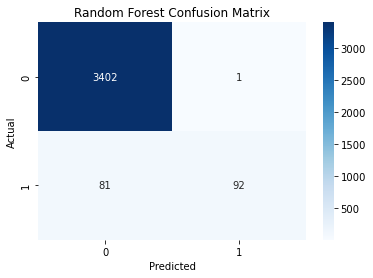

In [132]:
# 8. Visualizations
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap = 'Blues')  # Plot confusion matrix
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [122]:
# 9. SVM Baseline Mode-2
# Model initialization
svm_clf = SVC(kernel = 'linear', random_state = 42, probability = True)  # Using linear kernel for text data
svm_clf.fit(X_train, y_train)  # Train the SVM model on the training data

SVC(kernel='linear', probability=True, random_state=42)

In [123]:
# 10. Evaluation
y_pred_svm = svm_clf.predict(X_test)  # Predict labels for the test set
y_proba_svm = svm_clf.predict_proba(X_test)[:, 1]  # Get probabilites for the positive class

In [124]:
print("SVM Classification Report:\n")
print(classification_report(y_test, y_pred_svm))  # Print classification report

SVM Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3403
           1       1.00      0.33      0.50       173

    accuracy                           0.97      3576
   macro avg       0.98      0.66      0.74      3576
weighted avg       0.97      0.97      0.96      3576



In [125]:
print("SVM Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_svm))  # Print confusion matrix

SVM Confusion Matrix:

[[3403    0]
 [ 116   57]]


In [160]:
print("SVM ROC-AUC Score:", roc_auc_score(y_test, y_proba_svm))  # Print ROC-AUC score

SVM ROC-AUC Score: 0.9056026729220562


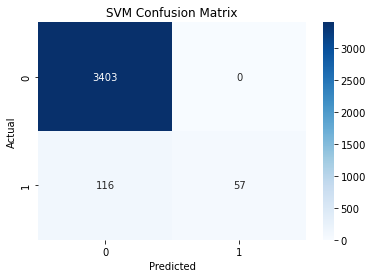

In [128]:
# 11. Visualization
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot = True, fmt = 'd', cmap = 'Blues')  # Plot confusion matrix
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()